# Introduction and business understanding

The problem to be solved is how to predict the likelyhood of getting into an accident based on certain conditions being present. 

This report will be targeted to the general driving public to raise awareness of the risks of driving under certain conditions.

Since there are a wide range of conditions present when driving we will identify those conditions which have the greatest impact upon likelyhood of leading to a severe accident.

# Data understanding

The data source selected is https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

First the data will be imported and viewed to get a sense of what the different data fields available are.

In [1]:
##load library and file
## the warning below notes that pandas cannot determine the data type
import numpy as np
import pandas as pd
df=pd.read_csv('https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv')
print('Data downloaded!')


/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Data downloaded!


In [2]:
##display columns and a short sample of data
df.head(10)

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N
5,1,-122.387598,47.690575,6,320840,322340,E919477,Matched,Intersection,36974.0,...,Dry,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
6,1,-122.338485,47.618534,7,83300,83300,3282542,Matched,Intersection,29510.0,...,Wet,Daylight,NaN,8344002.0,NaN,10,Entering at angle,0,0,N
7,2,-122.320780,47.614076,9,330897,332397,EA30304,Matched,Intersection,29745.0,...,Dry,Daylight,NaN,NaN,NaN,5,Vehicle Strikes Pedalcyclist,6855,0,N
8,1,-122.335930,47.611904,10,63400,63400,2071243,Matched,Block,NaN,...,Dry,Daylight,NaN,6166014.0,NaN,32,One parked--one moving,0,0,N
9,2,-122.384700,47.528475,12,58600,58600,2072105,Matched,Intersection,34679.0,...,Dry,Daylight,NaN,6079001.0,NaN,10,Entering at angle,0,0,N


## Data Cleaning

The results below display the number of rows with null values

In [3]:
df.shape

(194673, 38)

The data columns that I will be focusing on are location, speeding, weather, road condition, light condition, VEHCOUNT,JUNCTIONTYPE,PERSONCOUNT. Severity Code is the outcome to predict.

In [3]:
df_conditions=df.filter(['SEVERITYCODE','X','Y','LOCATION','SPEEDING','WEATHER','ROADCOND','LIGHTCOND','JUNCTIONTYPE','PERSONCOUNT','VEHCOUNT'])
df_conditions2=df.filter(['SEVERITYCODE','WEATHER'])
df_conditions2.head()

,SEVERITYCODE,WEATHER
0,2,Overcast
1,1,Raining
2,1,Overcast
3,1,Clear
4,2,Raining


The below illustrates the number of columns that have null values and need to be transformed or removed

In [5]:
##determine how many rows have nil values per column

df_conditions.isnull().sum()

SEVERITYCODE         0
X                 5334
Y                 5334
LOCATION          2677
SPEEDING        185340
WEATHER           5081
ROADCOND          5012
LIGHTCOND         5170
JUNCTIONTYPE      6329
PERSONCOUNT          0
VEHCOUNT             0
dtype: int64

In [6]:
df_conditions['JUNCTIONTYPE'].replace(
    np.nan, 'Unknown', inplace=True)

In [7]:
df_conditions['SPEEDING'].fillna(value='N', inplace=True)
df_conditions['WEATHER'].replace(
    np.nan, 'Unknown', inplace=True)
df_conditions['ROADCOND'].replace(
    np.nan, 'Unknown', inplace=True)
df_conditions['LIGHTCOND'].replace(
    np.nan, 'Unknown', inplace=True)
df_conditions['JUNCTIONTYPE'].replace(
    np.nan, 'Unknown', inplace=True)

In [8]:
df_conditions.dropna(subset=['X','Y'], how='any',inplace=True)

In [9]:
df_conditions.shape

(189339, 11)

The below is used to count the different types per column to identify spelling issues/duplicates

In [10]:
df_conditions['WEATHER'].value_counts()

Clear                       108959
Raining                      32015
Overcast                     27136
Unknown                      18818
Snowing                        894
Other                          773
Fog/Smog/Smoke                 553
Sleet/Hail/Freezing Rain       112
Blowing Sand/Dirt               50
Severe Crosswind                24
Partly Cloudy                    5
Name: WEATHER, dtype: int64

Below is confirmation that there are no more null values in the dataframe.

In [11]:
df_conditions.isnull().sum()

SEVERITYCODE    0
X               0
Y               0
LOCATION        0
SPEEDING        0
WEATHER         0
ROADCOND        0
LIGHTCOND       0
JUNCTIONTYPE    0
PERSONCOUNT     0
VEHCOUNT        0
dtype: int64

In [12]:
df_conditions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189339 entries, 0 to 194672
Data columns (total 11 columns):
SEVERITYCODE    189339 non-null int64
X               189339 non-null float64
Y               189339 non-null float64
LOCATION        189339 non-null object
SPEEDING        189339 non-null object
WEATHER         189339 non-null object
ROADCOND        189339 non-null object
LIGHTCOND       189339 non-null object
JUNCTIONTYPE    189339 non-null object
PERSONCOUNT     189339 non-null int64
VEHCOUNT        189339 non-null int64
dtypes: float64(2), int64(3), object(6)
memory usage: 17.3+ MB


# Data understanding

### We will consider the correlation between weather and accident severity:

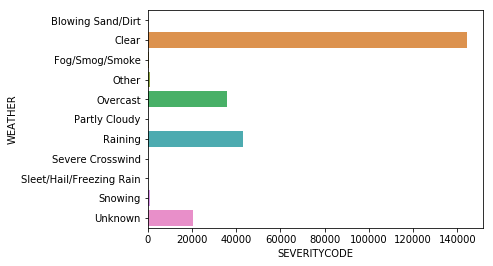

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
grouper_1 = df_conditions[['WEATHER','SEVERITYCODE']]
weather_severity = grouper_1.groupby(by = 'WEATHER',as_index=False).sum()
plt = sns.barplot(weather_severity['SEVERITYCODE'],weather_severity['WEATHER'])

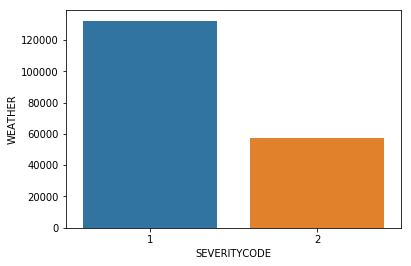

In [16]:
grouper_a = df_conditions[['WEATHER','SEVERITYCODE']]
weather_severity_1 = grouper_a.groupby(by = 'SEVERITYCODE',as_index=False).count()
plt2 = sns.barplot(weather_severity_1['SEVERITYCODE'],weather_severity_1['WEATHER'])

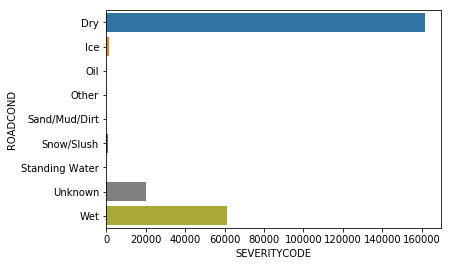

In [18]:
grouper_3 = df_conditions[['ROADCOND','SEVERITYCODE']]
road_type_severity = grouper_3.groupby(by = 'ROADCOND',as_index=False).sum()
plt3 = sns.barplot(road_type_severity['SEVERITYCODE'],road_type_severity['ROADCOND'])

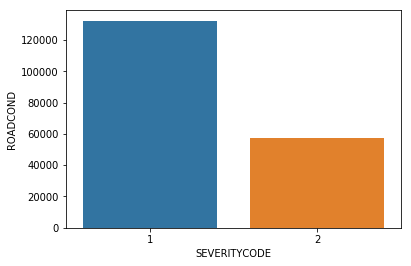

In [21]:
grouper_c = df_conditions[['ROADCOND','SEVERITYCODE']]
road_type_severity_1 = grouper_c.groupby(by = 'SEVERITYCODE',as_index=False).count()
plt4 = sns.barplot(road_type_severity_1['SEVERITYCODE'],road_type_severity_1['ROADCOND'])

In [ ]:
weather_condition_number_list = []

for condition in df_conditions['WEATHER']:
    
    if (condition == 'Fine without high winds'):
        weather_condition_number_list.append(3)
        
    if (condition == 'Raining without high winds'):
        weather_condition_number_list.append(3)
        
    if (condition == 'Raining with high winds'):
        weather_condition_number_list.append(2)
        
    if (condition == 'Other'):
        weather_condition_number_list.append(2)
        
    if (condition == 'Fine with high winds'):
        weather_condition_number_list.append(2)
        
    if (condition == 'Fog or mist'):
        weather_condition_number_list.append(1)
    
    if (condition == 'Snowing without high winds'):
        weather_condition_number_list.append(1)
        
    if (condition == 'Snowing with high winds'):
        weather_condition_number_list.append(1)
        
        Clear                       108959
Raining                      32015
Overcast                     27136
Unknown                      18818
Snowing                        894
Other                          773
Fog/Smog/Smoke                 553
Sleet/Hail/Freezing Rain       112
Blowing Sand/Dirt               50
Severe Crosswind                24
Partly Cloudy                    5

In [4]:
df_conditions2['WEATHER']=df_conditions['WEATHER'].astype('category').cat.codes
df_conditions2.corr()

,SEVERITYCODE,WEATHER
SEVERITYCODE,1.000000,-0.099871
WEATHER,-0.099871,1.000000
